# Exploratory Data Analysis (EDA) 

In this file we perform EDA on our datasets to discover the data, identify trends, see the relationship between our variables and our target (cyclist count).

In [1]:
# Imports
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We load the dataset. 

In [2]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


## 1 - Basic Data Inspection

In [8]:
# Check data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

We see 5 categorical columns, 2 datetime columns, 4 float columns and one int column

In [9]:
# Statistical summary of numerical columns
data.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


**bike_count / log_bike_count :**

The mean (60.19) and median (29) show that the distribution of bike_count is skewed right—most checkpoints record lower bike counts, but a few have very high counts (outliers).

The maximum (1,302) is significantly higher than the 75th percentile (79), confirming outliers or high-traffic areas.

The log transformation (log_bike_count) reduces the skewness, making the data more suitable for predictive modeling. This also implies the need for statistical methods that work well with logarithmic scales or data normalization.


**latitude / longitude :**

Concentrated within paris, minimal standard deviation.

Spatial clustering is implied; we should map these locations to analyze whether high bike_count values correlate with specific regions or features (e.g., tourist areas, bike-friendly infrastructure).

**date :**

The range (2020-09-01 to 2021-09-09) covers roughly one year. This is important because:

We can explore seasonality in bike traffic (e.g., differences between summer and winter). Trends over time (e.g., growing or declining bike usage due to policies like COVID-19 lockdowns).


In [11]:
# Statistical summary of categorical columns
data.describe(include=['category'])

,counter_id,counter_name,site_name,coordinates,counter_technical_id
count,496827,496827,496827,496827,496827
unique,56,56,30,30,30
top,100007049-101007049,Face au 4 avenue de la porte de Bagnolet O-E,Face au 40 quai D'Issy,"48.82636,2.30303",Y2H15027244
freq,8974,8974,17948,17948,17948


**counter_id / counter_name :**

56 unique counters exist, but the distribution is uneven:

The most active counter (“Face au 4 avenue de la porte de Bagnolet O-E”) recorded 8,974 entries, while some counters likely have much less data. 

This raises concerns about:

1. Imbalanced data: Less frequent counters may introduce bias in spatial analysis.
2. Site-specific trends: Does bike_count depend on the physical location or counter-specific issues (e.g., maintenance)?




In [13]:
# Total missing values per column
data.isnull().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64

**No missing values.** 

In [14]:
# Most frequented stations
(
    data.groupby(["site_name", "counter_name"])["bike_count"].sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

/var/folders/jc/3d20v7t934vcpdfm0vc8y2h00000gn/T/ipykernel_89528/1697510524.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["site_name", "counter_name"])["bike_count"].sum()


,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1992227.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1551730.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1497912.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1130565.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,1015875.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,984914.0
Quai d'Orsay,Quai d'Orsay E-O,948357.0
Totem Cours la Reine,Totem Cours la Reine O-E,894937.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,884907.0


### Additional Insight:

1. **Spatial Influence:**

    The spatial clustering of counters and the variability in bike_count suggest that location is a key predictor. High-traffic areas (e.g., “Face au 40 quai D’Issy”) likely have distinct patterns.

2. **Temporal Trends:**

    Seasonal and daily patterns in bike traffic should be explored. For example:
    
    Summer vs. winter differences.
    
    Weekdays vs. weekends.
    
    Rush hours vs. off-peak times.
    
    
3. **Counter-Specific Bias:**

    Differences in counter activity (frequency of observations and counter_installation_date) might introduce bias. Older counters likely have more data, but they may not reflect current traffic accurately.

4. **Outliers:**

    The high maximum bike_count (1,302) implies potential outliers. These may correspond to special events, major hubs, or data errors. Outlier handling will be critical for modeling.
    
5. **Logarithmic Transformation:**

    The use of log_bike_count as a feature shows an effort to stabilize variance. This suggests the data is skewed, and predictive models (e.g., linear regression) might benefit from working with the transformed variable.

## (2) - Feature Engineering

In [59]:
# Copy the dataframe to avoid modifying the original
df_fe = data.copy()

# Extract date-time features
df_fe['year'] = df_fe['date'].dt.year
df_fe['month'] = df_fe['date'].dt.month
df_fe['day'] = df_fe['date'].dt.day
df_fe['weekday'] = df_fe['date'].dt.weekday  # Monday=0, Sunday=6
df_fe['hour'] = df_fe['date'].dt.hour

# Check the new columns
df_fe[['date', 'year', 'month', 'day', 'weekday', 'hour']].head()

,date,year,month,day,weekday,hour
48321,2020-09-01 02:00:00,2020,9,1,1,2
48324,2020-09-01 03:00:00,2020,9,1,1,3
48327,2020-09-01 04:00:00,2020,9,1,1,4
48330,2020-09-01 15:00:00,2020,9,1,1,15
48333,2020-09-01 18:00:00,2020,9,1,1,18


**(1) - New Weekend Variable**

As weekends may have different traffic patterns, create a binary variable to indicate weekends.

In [60]:
# Create a binary variable for weekends
df_fe['is_weekend'] = df_fe['weekday'].apply(lambda x: 1 if x >= 5 else 0)

**(2) - New Holiday Indicator**

Holidays can significantly impact cyclist counts. We’ll use the holidays library to identify French public holidays.

In [61]:
import holidays

# Create a holiday indicator
fr_holidays = holidays.France()
df_fe['is_holiday'] = df_fe['date'].dt.date.apply(lambda x: 1 if x in fr_holidays else 0)

**(3) - Encode Cyclical Time Features**

Time features like ‘hour’ and ‘month’ are cyclical.

In [62]:
# Encode 'hour' as cyclical features
df_fe['hour_sin'] = np.sin(2 * np.pi * df_fe['hour'] / 24)
df_fe['hour_cos'] = np.cos(2 * np.pi * df_fe['hour'] / 24)

# Encode 'month' as cyclical features
df_fe['month_sin'] = np.sin(2 * np.pi * df_fe['month'] / 12)
df_fe['month_cos'] = np.cos(2 * np.pi * df_fe['month'] / 12)

**(4) - Create Seasonal Features**

Define seasons based on months.

In [63]:
# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Apply the function
df_fe['season'] = df_fe['month'].apply(month_to_season)

# Convert 'season' to categorical type
df_fe['season'] = df_fe['season'].astype('category')

**(5) - Time Since Installation**

Calculate the number of days since the counter was installed.

In [64]:
# Time difference in days between data point and counter installation
df_fe['days_since_installation'] = (df_fe['date'] - df_fe['counter_installation_date']).dt.days

**(6) - Lag Features**

Create lag features to capture trends from previous time steps.

In [65]:
# Sort values to ensure correct lagging
df_fe = df_fe.sort_values(['counter_name', 'date'])

# Create lag features for 'bike_count' for the previous hour
df_fe['bike_count_lag_1'] = df_fe.groupby('counter_name')['bike_count'].shift(1)

/var/folders/jc/3d20v7t934vcpdfm0vc8y2h00000gn/T/ipykernel_89528/4246174677.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe['bike_count_lag_1'] = df_fe.groupby('counter_name')['bike_count'].shift(1)


**(7) - Rolling Statistics**

Compute rolling averages or sums to capture trends over time.

In [66]:
# Rolling mean over the past 3 hours
df_fe['bike_count_roll_mean_3'] = df_fe.groupby('counter_name')['bike_count'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Rolling mean over the past 7 days (168 hours)
df_fe['bike_count_roll_mean_168'] = df_fe.groupby('counter_name')['bike_count'].rolling(window=168).mean().reset_index(level=0, drop=True)

/var/folders/jc/3d20v7t934vcpdfm0vc8y2h00000gn/T/ipykernel_89528/3286423633.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe['bike_count_roll_mean_3'] = df_fe.groupby('counter_name')['bike_count'].rolling(window=3).mean().reset_index(level=0, drop=True)
/var/folders/jc/3d20v7t934vcpdfm0vc8y2h00000gn/T/ipykernel_89528/3286423633.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fe['bike_count_roll_mean_168'] = df_fe.groupby('counter_name')['bike_count'].rolling(window=168).mean().reset_index(level=0, drop=True)


**(8) - Spatial Features**

Incorporate spatial information effectively. 

Distance to City Center: Calculate the distance from each counter to a central point in Paris.

In [67]:
from geopy.distance import geodesic

# Define city center coordinates (e.g., Notre-Dame Cathedral)
city_center = (48.8530, 2.3499)

# Function to calculate distance
def calculate_distance(row):
    counter_location = (row['latitude'], row['longitude'])
    return geodesic(counter_location, city_center).kilometers

# Apply the function
df_fe['distance_to_center'] = df_fe.apply(calculate_distance, axis=1)

**(9) - Encode Categorical Variables**

Convert categorical variables into numerical form.

In [68]:
# Option 1: Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_fe['counter_name_encoded'] = label_encoder.fit_transform(df_fe['counter_name'])
df_fe['site_name_encoded'] = label_encoder.fit_transform(df_fe['site_name'])

# Option 2: One-Hot Encoding (creates many columns if categories are numerous)
# df_fe = pd.get_dummies(df_fe, columns=['counter_name', 'site_name'])

### Outliers

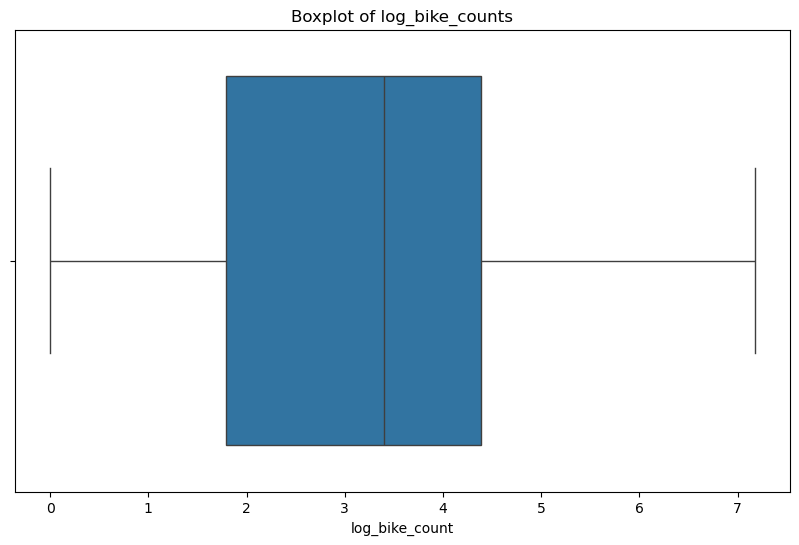

In [69]:
# Visualize log_bike_count distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_fe['log_bike_count'])
plt.title('Boxplot of log_bike_counts')
plt.show()

## (3) - Analysis of Engineered Features

### Correlation Analysis

Compute the correlation between numerical features and ‘log_bike_count’.

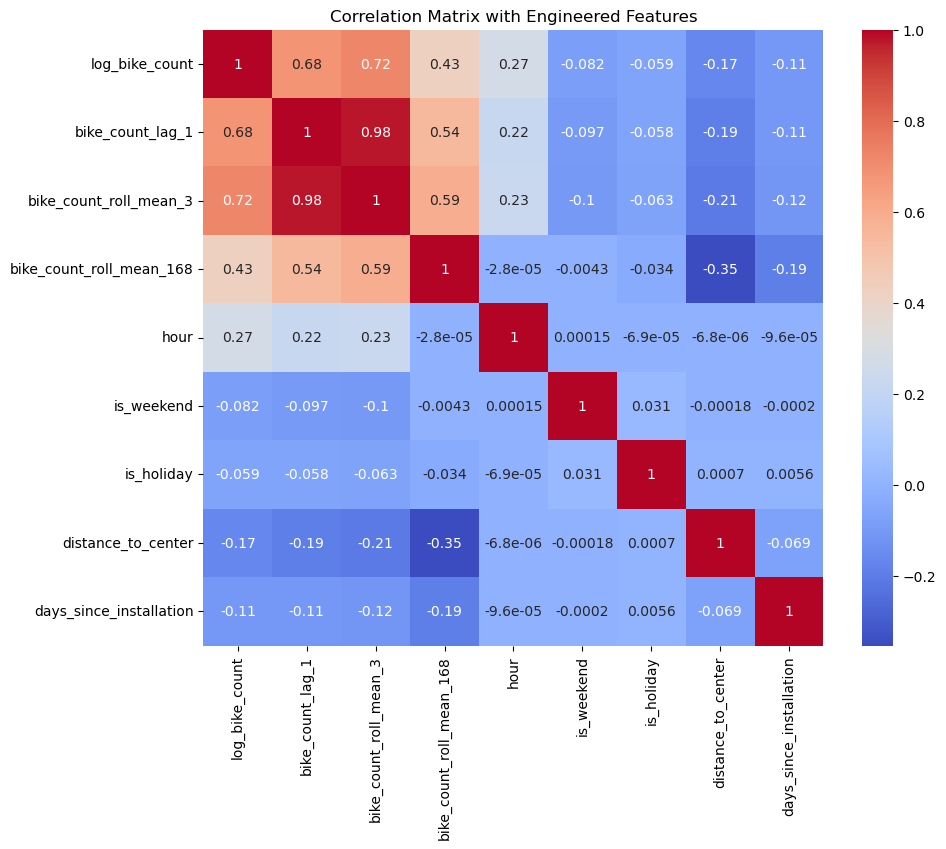

In [70]:
# Select relevant numerical features
numerical_features = ['log_bike_count', 'bike_count_lag_1', 'bike_count_roll_mean_3',
                      'bike_count_roll_mean_168', 'hour', 'is_weekend', 'is_holiday',
                      'distance_to_center', 'days_since_installation']

# Compute correlation matrix
corr_matrix = df_fe[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Engineered Features')
plt.show()

### Feature Importance using Random Forest

Use a simple Random Forest model to estimate feature importance.

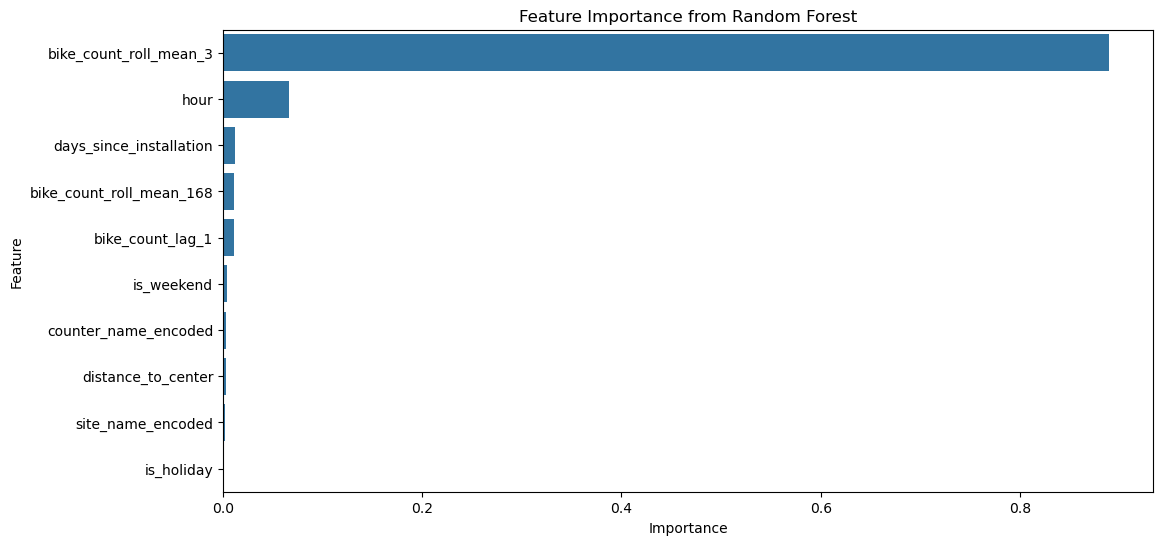

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['hour', 'is_weekend', 'is_holiday', 'distance_to_center',
            'days_since_installation', 'bike_count_lag_1', 'bike_count_roll_mean_3',
            'bike_count_roll_mean_168', 'counter_name_encoded', 'site_name_encoded']

# Drop rows with NaN values (due to lagging)
df_model = df_fe.dropna(subset=features + ['log_bike_count'])

X = df_model[features]
y = df_model['log_bike_count']

# Split the data (use temporal split if appropriate)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

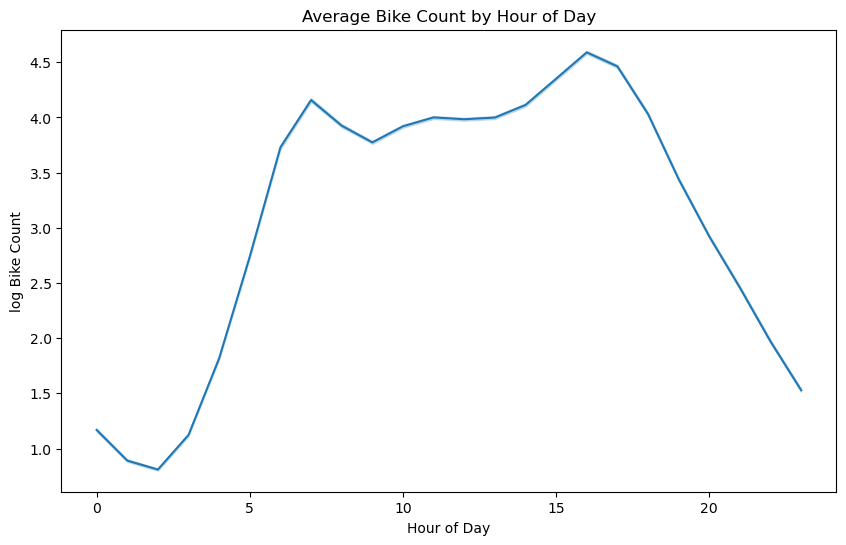

In [72]:
# Bike Count vs. Hour of Day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='log_bike_count', data=df_fe)
plt.title('Average Bike Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('log Bike Count')
plt.show()

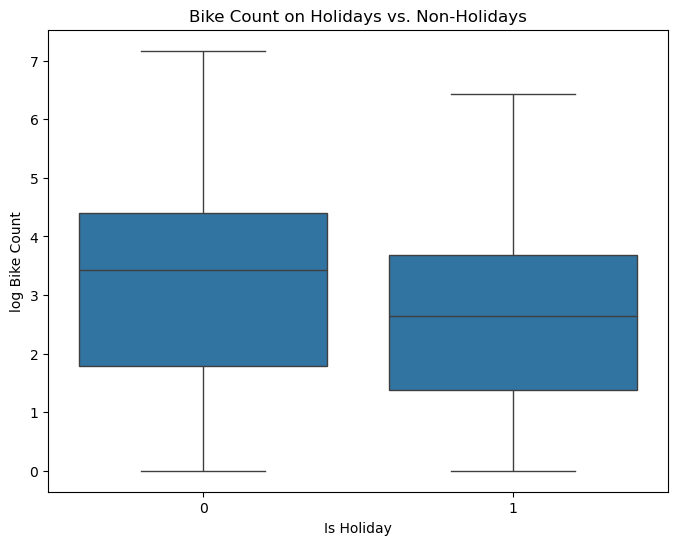

In [73]:
# Bike Count on Holidays vs. Non-Holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_holiday', y='log_bike_count', data=df_fe)
plt.title('Bike Count on Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('log Bike Count')
plt.show()

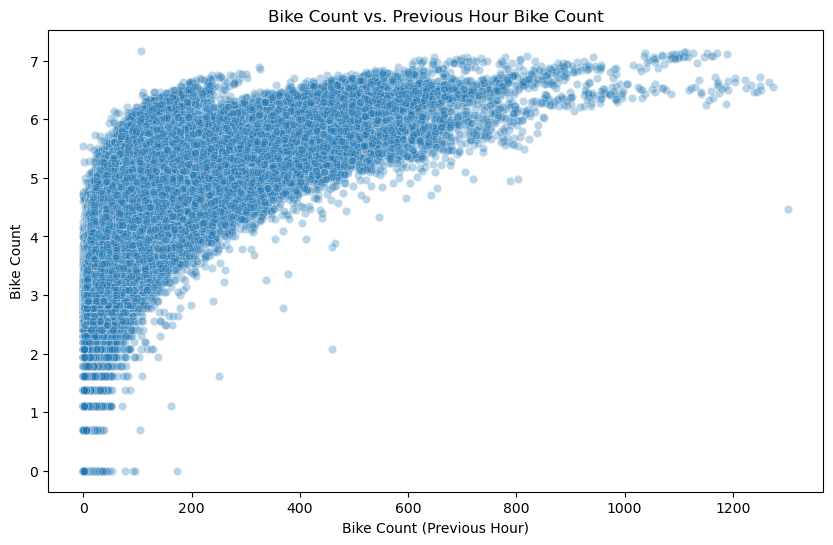

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bike_count_lag_1', y='log_bike_count', data=df_fe, alpha=0.3)
plt.title('Bike Count vs. Previous Hour Bike Count')
plt.xlabel('Bike Count (Previous Hour)')
plt.ylabel('Bike Count')
plt.show()

## Basic Model Test

In [75]:
# Drop rows with missing values in lag features
df_fe = df_fe.dropna(subset=['bike_count_lag_1', 'bike_count_roll_mean_3', 'bike_count_roll_mean_168'])

# Define the features and target
features = [
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
    'is_weekend', 'is_holiday', 'distance_to_center',
    'bike_count_lag_1', 'bike_count_roll_mean_3', 'bike_count_roll_mean_168',
    'counter_name', 'site_name'
]

X = df_fe[features]
y = df_fe['log_bike_count']

# Add 'date' to X for time-based splitting
X['date'] = df_fe['date']

# Perform the split
def train_test_split_temporal(X, y, delta_threshold="30 days"):
    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = (X["date"] <= cutoff_date)
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y.loc[mask], y.loc[~mask]
    return X_train.drop(columns='date'), y_train, X_valid.drop(columns='date'), y_valid

X_train, y_train, X_valid, y_valid = train_test_split_temporal(X, y)

# Preprocessing pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge

numeric_features = [
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
    'is_weekend', 'is_holiday', 'distance_to_center',
    'bike_count_lag_1', 'bike_count_roll_mean_3', 'bike_count_roll_mean_168'
]

categorical_features = ['counter_name', 'site_name']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the model
model = Ridge()

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error

y_train_pred = pipeline.predict(X_train)
y_valid_pred = pipeline.predict(X_valid)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_valid = mean_squared_error(y_valid, y_valid_pred, squared=False)

print(f"Train set, RMSE={rmse_train:.2f}")
print(f"Valid set, RMSE={rmse_valid:.2f}")

# Baseline prediction
baseline_pred = np.full_like(y_valid, y_train.mean())
rmse_baseline = mean_squared_error(y_valid, baseline_pred, squared=False)
print(f"Baseline RMSE={rmse_baseline:.2f}")

# Cross-validation
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

cv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(
    pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error'
)

mean_rmse = -scores.mean()
std_rmse = scores.std()

print(f"Cross-validated RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}")

/var/folders/jc/3d20v7t934vcpdfm0vc8y2h00000gn/T/ipykernel_89528/3231705825.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = df_fe['date']
/Users/leroy/anaconda3/envs/pleasework/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leroy/anaconda3/envs/pleasework/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leroy/anaconda3/en

Train set, RMSE=0.81
Valid set, RMSE=0.78
Baseline RMSE=1.49
Cross-validated RMSE: 0.93 ± 0.20
